In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

import torch_nf
from torch_nf.conditional_nf import NormFlow, ConditionedNormFlow
from torch_nf.error_formatters import dbg_check
from torch_nf.systems import Toy
from torch_nf.util import plot_dist
from torch_nf.lfi import train_SNPE

import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Define system
N = 4
system = Toy(N)

z0 = np.array([[0.7, -2.9, -1., -0.9, 0.6]])
x0 = system.simulate(z0)
print('x_0', x0, x0.shape)

x_0 [[ 0.59865663 -3.68576796  0.90494897 -3.21946005 -0.07064493 -3.61092645
   0.64744514 -2.6232073 ]] (1, 8)


In [3]:
from torch_nf.bijectors import ToInterval
# Opt params
D = system.D
M = 1000
num_iters = 2000
R = 4

# two-network arch
arch_type = 'coupling'
hidden_layers = [100]

rs = 1
np.random.seed(rs)
torch.manual_seed(rs)

lb = system.lb
ub = system.ub
support_layer = ToInterval(D, lb, ub)

nf = NormFlow(D, arch_type, True, num_stages=1, 
              num_layers=2, num_units=25, support_layer=support_layer)
cnf = ConditionedNormFlow(nf, x0.shape[1], hidden_layers, dropout=False)
print(cnf.param_net)

Sequential(
  (linear1): Linear(in_features=8, out_features=100, bias=True)
  (tanh1): Tanh()
  (linear2): Linear(in_features=100, out_features=3210, bias=True)
)


### Run SNPE

tensor([ 0.0036,  0.1087, -0.1101,  0.0308, -0.0239]) tensor([2.9964, 3.0989, 2.8316, 3.0125, 2.9689])
z mean, var
w tensor(0.0010) tensor(0.0010)


/Users/sbittner/anaconda/envs/torch_nf/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


r 1, it 1, loss=9.13E+01
r 1, it 20, loss=2.22E-02
r 1, it 40, loss=1.78E-02
r 1, it 60, loss=1.59E-02
r 1, it 80, loss=1.58E-02
r 1, it 100, loss=1.62E-02
r 1, it 120, loss=1.55E-02
r 1, it 140, loss=1.40E-02
r 1, it 160, loss=1.36E-02
r 1, it 180, loss=1.30E-02
r 1, it 200, loss=1.20E-02
r 1, it 220, loss=1.17E-02
r 1, it 240, loss=1.22E-02
r 1, it 260, loss=1.15E-02
r 1, it 280, loss=1.11E-02
r 1, it 300, loss=1.11E-02
r 1, it 320, loss=1.14E-02
r 1, it 340, loss=1.09E-02
r 1, it 360, loss=1.12E-02
r 1, it 380, loss=1.13E-02
r 1, it 400, loss=1.11E-02
r 1, it 420, loss=1.09E-02
r 1, it 440, loss=1.02E-02
r 1, it 460, loss=9.55E-03
r 1, it 480, loss=9.49E-03
r 1, it 500, loss=8.52E-03
r 1, it 520, loss=8.46E-03
r 1, it 540, loss=8.82E-03
r 1, it 560, loss=8.94E-03
r 1, it 580, loss=8.60E-03
r 1, it 600, loss=7.73E-03
r 1, it 620, loss=7.71E-03
r 1, it 640, loss=7.41E-03
r 1, it 660, loss=8.37E-03
r 1, it 680, loss=7.16E-03
r 1, it 700, loss=7.19E-03
r 1, it 720, loss=7.75E-03
r 1, it

<Figure size 432x288 with 0 Axes>

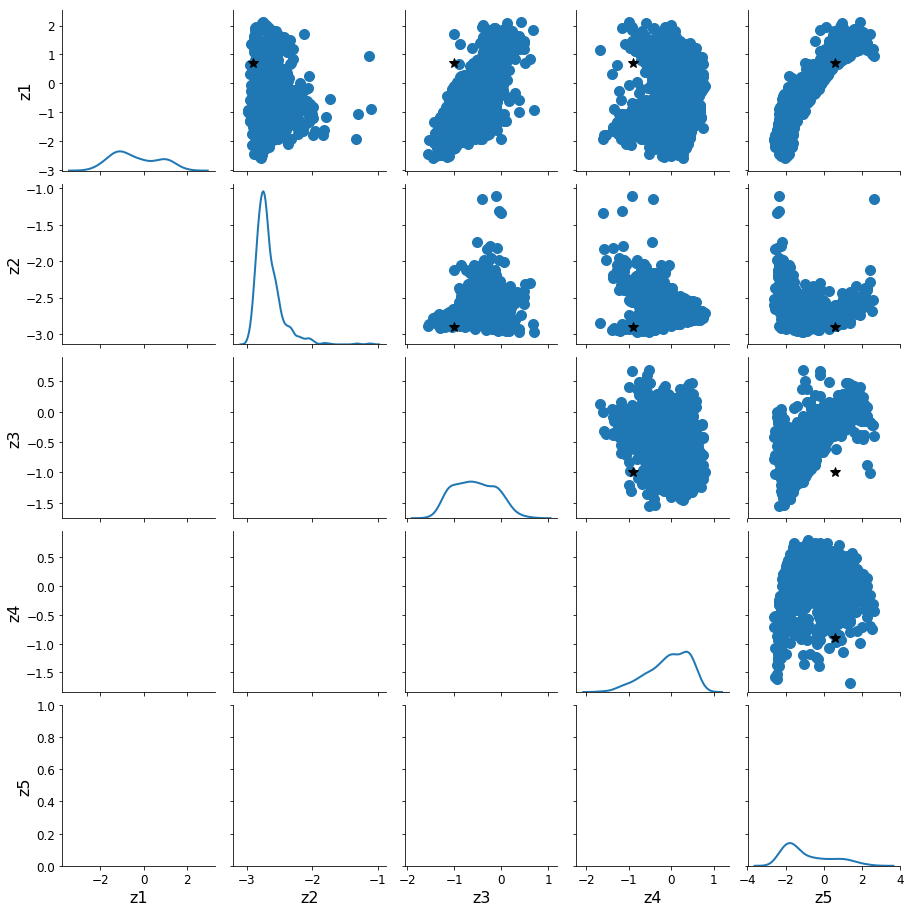

tensor([-0.4210, -2.6428, -0.5591, -0.1001, -0.9162], grad_fn=<MeanBackward1>) tensor([1.1512, 0.0606, 0.1913, 0.2666, 1.5725], grad_fn=<VarBackward1>)
z mean, var
w tensor(1.3269e-06, dtype=torch.float64) tensor(0.2104, dtype=torch.float64)
r 2, it 20, loss=1.44E-02
r 2, it 40, loss=1.11E-02
r 2, it 60, loss=1.19E-02
r 2, it 80, loss=1.46E-02
r 2, it 100, loss=1.53E-02
r 2, it 120, loss=1.14E-02
r 2, it 140, loss=9.99E-03
r 2, it 160, loss=1.23E-02
r 2, it 180, loss=1.04E-02
r 2, it 200, loss=9.77E-03
r 2, it 220, loss=1.04E-02
r 2, it 240, loss=5.89E-03
r 2, it 260, loss=1.25E-02
r 2, it 280, loss=7.92E-03
r 2, it 300, loss=7.87E-03
r 2, it 320, loss=9.10E-03
r 2, it 340, loss=9.30E-03
r 2, it 360, loss=8.58E-03
r 2, it 380, loss=8.19E-03
r 2, it 400, loss=7.70E-03
r 2, it 420, loss=7.19E-03
r 2, it 440, loss=2.83E-02
r 2, it 460, loss=1.21E-02
r 2, it 480, loss=6.83E-03
r 2, it 500, loss=6.78E-03
r 2, it 520, loss=6.98E-03
r 2, it 540, loss=8.21E-03
r 2, it 560, loss=7.78E-03
r 2, i

<Figure size 432x288 with 0 Axes>

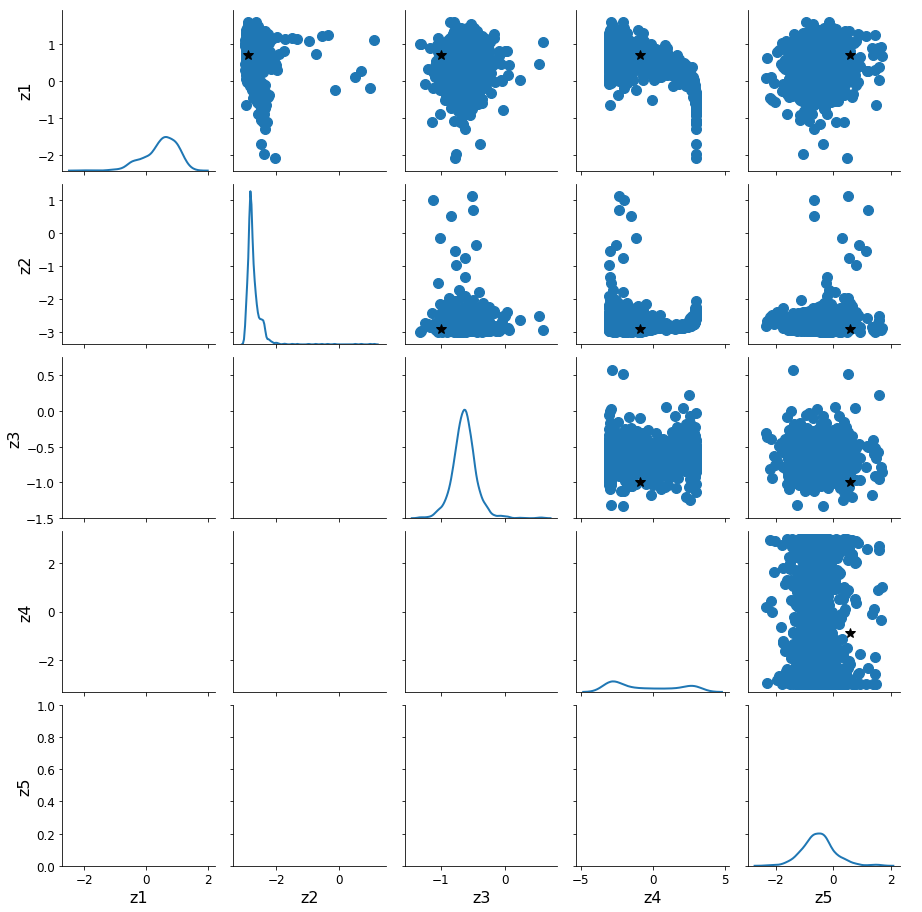

tensor([ 0.4623, -2.7157, -0.6377, -0.5188, -0.5349], grad_fn=<MeanBackward1>) tensor([0.2955, 0.0839, 0.0334, 5.2243, 0.3327], grad_fn=<VarBackward1>)
z mean, var
w tensor(1.1077e-09, dtype=torch.float64) tensor(0.4328, dtype=torch.float64)
r 3, it 20, loss=NAN


<Figure size 432x288 with 0 Axes>

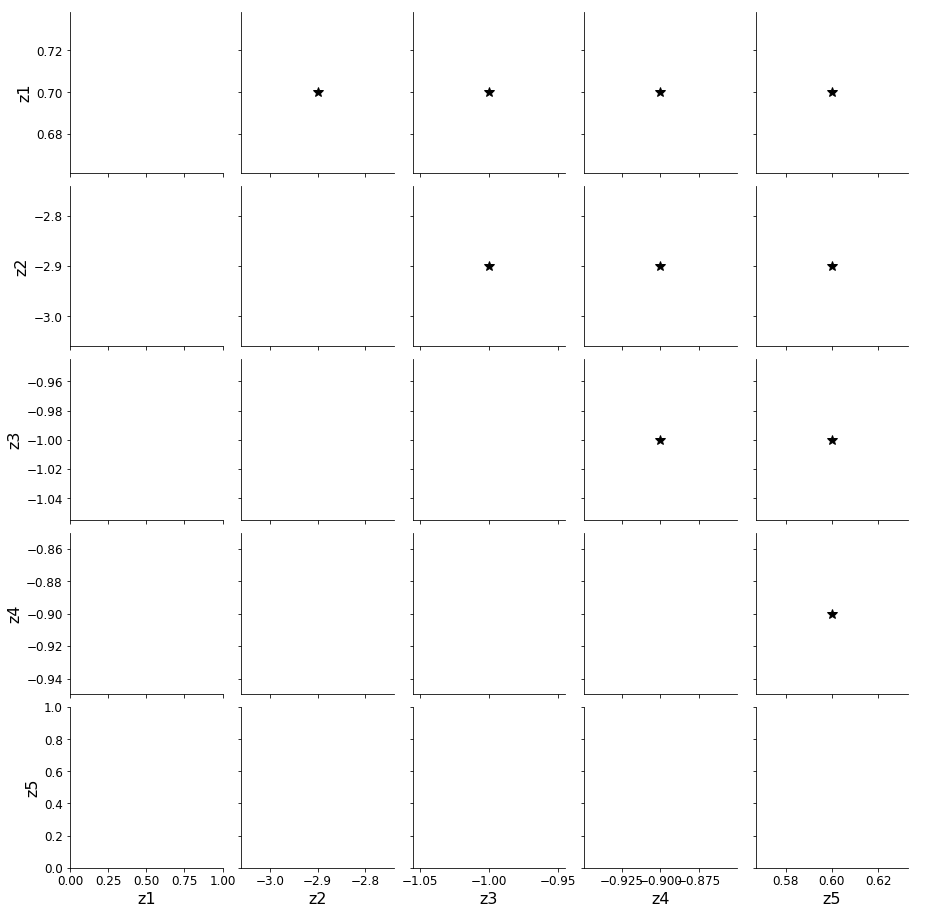

tensor([nan, nan, nan, nan, nan], grad_fn=<MeanBackward1>) tensor([nan, nan, nan, nan, nan], grad_fn=<VarBackward1>)
z mean, var
w tensor(nan, dtype=torch.float64) tensor(nan, dtype=torch.float64)


ValueError: array must not contain infs or NaNs

In [4]:
cnf, losses = train_SNPE(cnf, system, x0, M=M, R=R, num_iters=num_iters, z0=z0[0])

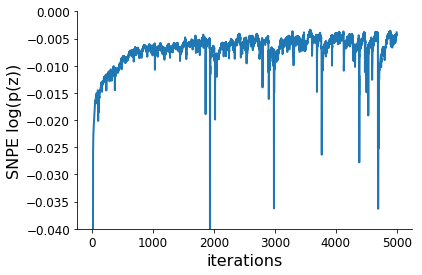

In [10]:
_losses = np.array(losses)
plt.figure()
plt.plot(-_losses)
plt.xlabel('iterations')
plt.ylabel('SNPE log(p(z))')
plt.ylim([-.04, 0])
plt.show()

In [11]:
x0_torch = torch.tensor(x0).float()
z, log_prob= cnf(x0_torch, N=100)

<Figure size 432x288 with 0 Axes>

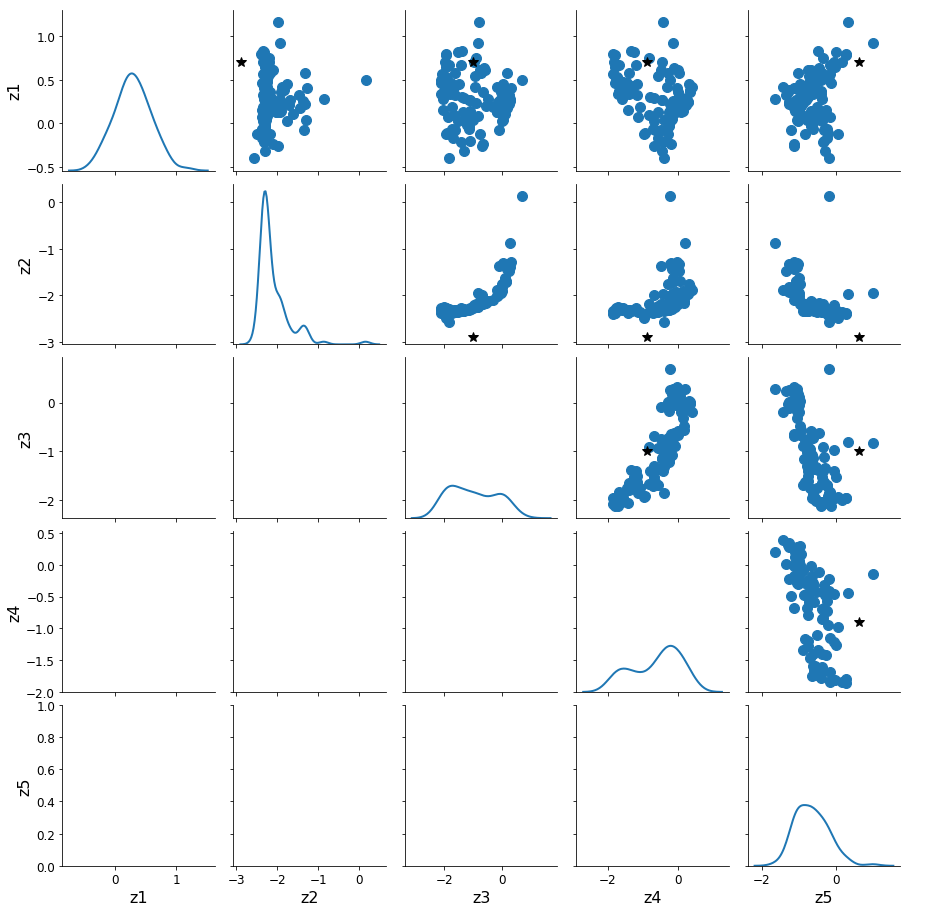

In [12]:
plt.figure()
g = plot_dist(z.detach().numpy()[0], log_prob.detach().numpy()[0], z0=z0[0])
